La ecuación de Schrödinger independiente del tiempo en una dimensión espacial es
$$
\mathcal{H} \psi(x) = E \psi(x),
$$
donde $\mathcal{H}$
 es el hamiltoniano del sistema, $\psi(x)$ es la función de onda de la partícula (que toma en general valores complejos) y $E$  es la energía del estado cuántico.

Vamos a tratar el caso de una partícula de masa $m$ en un potencial externo $V(x)$
$$
\mathcal{H}=-\frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2} + V(x),
$$
donde $\hbar$ es la constante de Planck reducida.

Los pasos para resolver el problema de autovalores y autovectores en la ecuación de Schrödinger 1D son:

1. Definir el dominio espacial, e.g.: $[x_{min},x_{max}]$ y las condiciones de contorno.

2. Discretizar el espacio en $N$ puntos con un espaciado uniforme $\Delta x=(x_{max}-x_{min})/(N-1)$.
* La función de onda está definida en los puntos $\psi_{k}\equiv\psi(k \Delta x)$, con $k=1,\ldots,N$.
* Discretizando el operador de Laplace en 1D:
$$
\frac{\partial^2}{\partial x^2}\approx \frac{\psi_{k+1} - 2\psi_{k} + \psi_{k-1}}{\Delta x^2}  
$$
donde $V_k=V(k \Delta x)$.

Nos queda un sistema sistema de ecuaciones para los $\psi_k$:
$$
-\frac{\hbar^2}{2m} \frac{\psi_{k+1} - 2\psi_{k} + \psi_{k-1}}{\Delta x^2} + V_k \psi_k = E \psi_k,
$$
que podemos escribir de la forma:
$$
- t \psi_{k+1} + (V_k + 2t)\psi_{k} -t \psi_{k-1} = E \psi_k,
$$
donde definimos $t=\frac{\hbar^2}{2m\Delta x^2}$.

3. Los términos de la izquierda determinan la matriz Hamiltoniana $H$
$$
H=\begin{pmatrix}
V_1+2t&-t&0&0&0&\cdots&0\\
-t&V_2+2t&-t&0&0&\cdots&0\\
0&-t&V_3+2t&-t&0&\cdots&0\\
0&0&-t&V_4+2t&-t&\ddots&0\\
\vdots&\vdots&\ddots&\ddots&\ddots&\ddots&-t\\
0&0&0&0&\cdots&-t&V_N+2t
\end{pmatrix}
$$

que se aplica al vector de la función de onda discretizada:
$$
\Psi= \begin{pmatrix}
\psi_1\\
\psi_2\\
\vdots\\
\psi_N
\end{pmatrix}
$$

4. Resolver el problema de autovalores y autovectores para la matriz Hamiltoniana:

$$
H \Psi = E \Psi.
$$

Esto nos permite obtener las autoenergías $E_n$ (autovalores de $H$) y las funciones de onda $\Psi_n$ correspondientes (autovectores) que satisfacen la ecuación de Schrödinger.

5. Normalizar las autofunciones de onda:

$$
\int_{-\infty}^{\infty} |\psi(x)|^2 dx = 1,
$$

que en el caso discreto se convierte en

$$
\sum_{k=1}^{N} |\psi_k|^2 \Delta x = 1.
$$




## Pozo de potencial
En el programa más abajo se resuelve el problema de una partícula en un potencial unidimensional:
$$
V(x) = \begin{cases}
    V_0 & \text{si} \; x > 3 \; \text{o} \; x < -3 \\
    0   & \text{en otro caso}
\end{cases}
$$

Este potencial representa una pozo de potencial de altura $V_0=10$ con bordes en $x = -3$ y $x = 3$. La partícula está libre (sin potencial) en el rango $-3 < x < 3$.

* El dominio que consideramos para la función de onda es $[-5,5]$. Esto es equivalente a poner un potencial infinito para $|x|>5$ o a agregar un punto a la izquieda (con $\psi_0=0$) y a la derecha del dominio (con $\psi_{N+1}=0$).

* La [solución exacta](https://es.wikipedia.org/wiki/Part%C3%ADcula_en_una_caja#Caja_unidimensional) para un potencial infinito  (caja) $V_0\to \infty$ es relativamente fácil de obtener.

* Para construir la matriz Hamiltoniana podemos usar que:
$$
H_{ij} = \begin{cases}
    2t + V_i & \text{si} \; i = j \\
    -t & \text{si} \; |i - j| = 1 \\
    0 & \text{en otro caso}
\end{cases}
$$


El programa grafica la función de onda con energía más cercana a $E$.


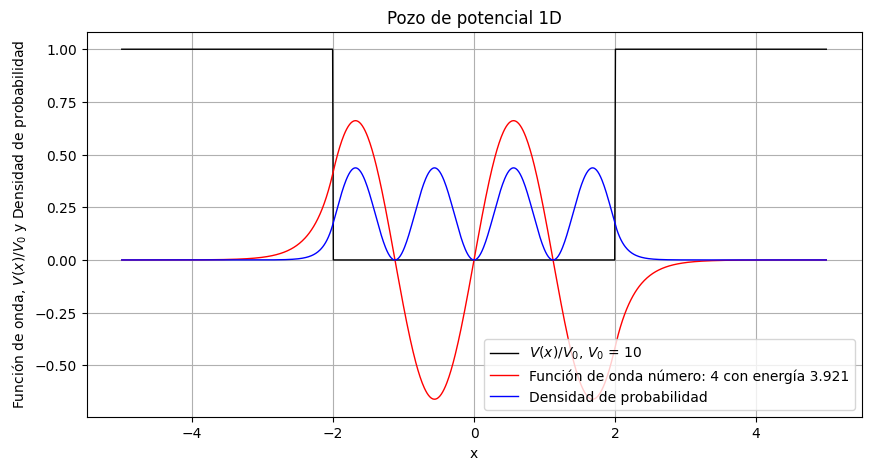

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes y parámetros
hbar = 1.0                     # h/2pi -> 1 por simplicidad
m = 1.0                        # Masa de la partícula
N = 1000                       # Número de puntos de discretización
x_min, x_max = -5, 5           # Dominio espacial
x = np.linspace(x_min, x_max, N)
dx = x[1] - x[0]               # Discretización
E = 4                          # Energía de la partícula (vamos a buscar el autovalor más cercano)
V0 = 10                        # Profundidad del pozo
ancho_del_pozo = 4

""" En otro contexto (materia condensada) el parámetro t se conoce como hopping porque si aplicamos H a una función de
onda localizada en algún sitio, va a aparecer una amplitud en los sitios vecinos. La partícula tiene una probabilidad de saltar a
esos sitio. """
t = hbar**2 / (2 * m * dx**2) # hopping

# Definimos el potencial
V = np.zeros(N)
V[x > ancho_del_pozo/2.0] = V0
V[x < -ancho_del_pozo/2.0] = V0

# Matriz Hamiltoniana
H = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        if i == j:
            H[i, j] = 2.0 * t + V[i]
        elif abs(i - j) == 1:
            H[i, j] = -t

# Obtenemos autovalores y autovectores usando numpy
eigvals, eigvecs = np.linalg.eigh(H)

# Ordenamos las autofunciones de acuerdo a su energía
inx = eigvals.argsort()[::-1]
eigenValues = eigvals[inx]
eigenVectors = eigvecs[:,inx]

# Buscamos el autoestado con energía cercana a E
idx = np.argmin(np.abs(eigvals - E))
psi = eigvecs[:, idx]

# Normalizamos la función de onda
psi = psi / np.sqrt(np.sum(np.abs(psi)**2 * dx))

# Graficamos
potlabel = "$V(x)/V_0$, " + "$V_0$ = " + str(V0)
ondalabel  ="Función de onda número: " +str(idx+1) + " con energía "  + f"{eigvals[idx]:.3f}"
plt.figure(figsize=(10, 5))
plt.plot(x, V/V0, 'k-', lw=1, label=potlabel)
plt.plot(x, psi, 'r-', lw=1, label=ondalabel)
plt.plot(x, np.abs(psi)**2, 'b-', lw=1, label="Densidad de probabilidad")
plt.legend()
plt.xlabel("x")
plt.ylabel("Función de onda, $V(x)/V_0$ y Densidad de probabilidad")
plt.title("Pozo de potencial 1D")
plt.grid()
plt.show()


Para este problema de la pozo de potencial 1D, se puede analizar lo siguiente:

* Las soluciones de la ecuación de Schrödinger independiente del tiempo en este problema nos dan autoenergías discretas que representan los niveles de energía cuantizados posibles para la partícula en la pozo de potencial. ¿Cómo dependen las energías del número de estado (ordenados de más baja a más alta energía), del ancho de la pozo y del potencial de confinamiento $V_0$. ¿Qué ocurre si la energía del estado es cercana o mayor a $V_0$?

* Las autofunciones asociadas con cada nivel de energía cuantizado representan el estado cuántico de la partícula en ese nivel de energía. Los *nodos* son puntos en la función de las funciones de onda donde su valor es cero. Analizar el número de nodos de las funciones de onda en relación a la energía de la misma.

* La densidad de probabilidad se obtiene al calcular el cuadrado de la magnitud de la función de onda, $|\psi(x)|^2$. La densidad de probabilidad indica la probabilidad de encontrar la partícula en una posición dada. Notar que para un potencial $V_0<\infty$ existe una probabilidad distinta de cero de encontrar la partícula en una región del espacio donde el potencial es mayor a la energía de la partícula. ¿Es esto posible para una partícula clásica?

* Las funciones de onda propias en este problema se pueden clasificar de acuerdo a su simetría par o impar con respecto al centro de la pozo de potencial. Verificar que las autofunciones son autovectores de un operador $\hat{P}$ que cambia $x$ por $-x$. ¿Con qué autovalores? Construir la matriz para $\hat{P}$ y verificar que conmuta con la matriz hamiltoniana: $[H,\hat{P}]=H\hat{P}-\hat{P}H=0$. ¿Cómo se podría usar esa información para hacer más fácil la resolución numérica de este problema? Esto es, hacer un cambio de base a una base que tenga simetría definida (estados pares o impares ante $\hat{P}$). $H$ en esa base debería estar compuesta por dos bloques desacoplados entre sí.

*  ¿Cómo podrían implementarse condiciones periódicas de contorno?

*  Para cada estado de energía, se pueden calcular los valores medios de posición y impulso, así como las desviaciones estándar asociadas.

Estas propiedades pueden ser útiles para comprender el comportamiento cuántico del sistema y cómo varía en función de diferentes parámetros, como el ancho o la altura del potencial o la masa de la partícula.


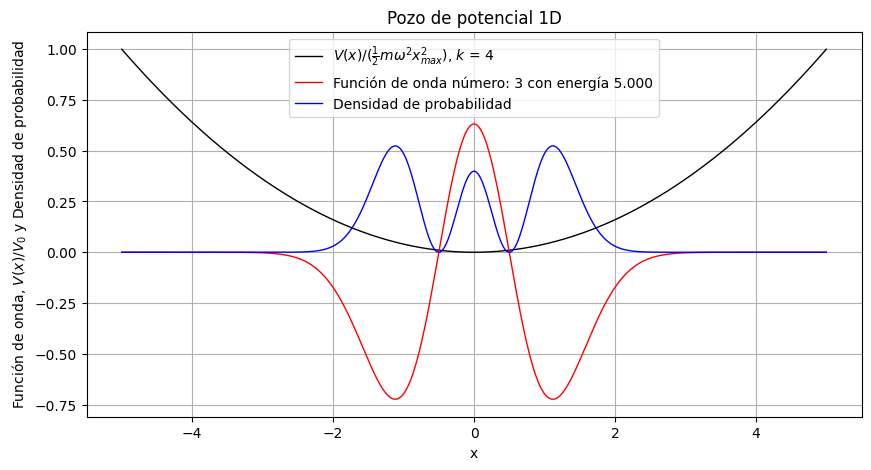

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes y parámetros
hbar = 1.0                     # h/2pi -> 1 por simplicidad
m = 1.0                        # Masa de la partícula
k = 4                          # Constante de resorte
N = 1000                       # Número de puntos de discretización
x_min, x_max = -5, 5           # Dominio espacial
x = np.linspace(x_min, x_max, N)
dx = x[1] - x[0]               # Discretización

omega = np.sqrt(k/m)

E = omega*(2+1/2.0)                 # Energía de la partícula (vamos a buscar el autovalor más cercano)

t = hbar**2 / (2 * m * dx**2) # hopping

# Definimos el potencial armónico
V = 0.5* k* x**2

# Matriz Hamiltoniana
H = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        if i == j:
            H[i, j] = 2.0 * t + V[i]
        elif abs(i - j) == 1:
            H[i, j] = -t

# Obtenemos autovalores y autovectores usando numpy
eigvals, eigvecs = np.linalg.eigh(H)

# Ordenamos las autofunciones de acuerdo a su energía
inx = eigvals.argsort()[::-1]
eigenValues = eigvals[inx]
eigenVectors = eigvecs[:,inx]

# Buscamos el autoestado con energía cercana a E
idx = np.argmin(np.abs(eigvals - E))
psi = eigvecs[:, idx]

# Normalizamos la función de onda
psi = psi / np.sqrt(np.sum(np.abs(psi)**2 * dx))

# Graficamos
potlabel = "$V(x)/(\\frac{1}{2}m\\omega^2 x_{max}^2)$, " + "$k$ = " + str(k)
ondalabel  ="Función de onda número: " +str(idx+1) + " con energía "  + f"{eigvals[idx]:.3f}"
plt.figure(figsize=(10, 5))
plt.plot(x, V/(0.5*m*omega**2* x_max**2), 'k-', lw=1, label=potlabel)
plt.plot(x, psi, 'r-', lw=1, label=ondalabel)
plt.plot(x, np.abs(psi)**2, 'b-', lw=1, label="Densidad de probabilidad")
plt.legend()
plt.xlabel("x")
plt.ylabel("Función de onda, $V(x)/V_0$ y Densidad de probabilidad")
plt.title("Potencial cuadrático 1D")
#plt.ylim((-2,2))
plt.grid()
plt.show()
